<h1> Using Scikit learn

In [149]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import add_dummy_feature
import numpy as np

iris=load_iris(as_frame=True)
X=iris.data
Y=iris.target_names[iris.target]

In [150]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler= StandardScaler()
columns=X.columns
X= pd.DataFrame(scaler.fit_transform(X),columns=columns)

In [151]:
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=add_dummy_feature(X)
scaler=StandardScaler()
trainx,testx,trainy,testy= train_test_split(X,Y,test_size=0.5)
validx=testx[:len(testx)//2]
validy=testy[:len(testy)//2]
testx=testx[len(testx)//2:]
testy=testy[len(testy)//2:]

In [152]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
validy_encoded=ohe.fit_transform(validy.reshape(-1,1),)
trainy_encoded=ohe.fit_transform(trainy.reshape(-1,1),)
testy_encoded=ohe.fit_transform(testy.reshape(-1,1),)

In [153]:
ohe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [154]:
def softmaxpred(theta,x):
    score=x@theta 
    predicts=[]
    for i in range(len(score)):
        if np.argmax(score[i])==0:
            predicts.append('setosa')
        if np.argmax(score[i])==1:
            predicts.append('versicolor')
        if np.argmax(score[i])==2:
            predicts.append('virginica')
    return np.array(predicts)


In [155]:
def gradientvector(probability,predicts,x):
    gradient=x.T@(probability-predicts)
    return gradient

In [156]:
theta=np.random.randn(5,3) #(5,3)= (no of features +1(for intercept), no of outputs)
predicts=softmaxpred(theta=theta,x=trainx)

In [157]:
def softmaxproba(logit):
    exponentials=np.exp(logit)
    return exponentials/np.sum(exponentials,axis=1,keepdims=True)

In [158]:
def softmaxproba_sto(logit):
    exponentials=np.exp(logit)
    return exponentials/np.sum(exponentials,keepdims=True)

In [159]:
from sklearn.metrics import accuracy_score
best_score=0
scores=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    score= accuracy_score(validy,validy_pred)
    scores.append(score)
    if (score>best_score):
        best_score=score
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)
    
    

In [160]:
testx

array([[ 1.        , -0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 1.        ,  1.2803405 ,  0.32841405,  1.10378283,  1.44883158],
       [ 1.        , -0.17367395, -0.59237301,  0.42173371,  0.13250973],
       [ 1.        , -0.7795133 , -0.82256978,  0.08070915,  0.26414192],
       [ 1.        ,  0.79566902, -0.13197948,  0.99010798,  0.79067065],
       [ 1.        , -0.53717756,  1.47939788, -1.2833891 , -1.3154443 ],
       [ 1.        ,  0.55333328, -0.36217625,  1.0469454 ,  0.79067065],
       [ 1.        ,  1.88617985, -0.59237301,  1.33113254,  0.92230284],
       [ 1.        , -0.90068117,  0.78880759, -1.2833891 , -1.3154443 ],
       [ 1.        , -0.90068117,  1.47939788, -1.2833891 , -1.05217993],
       [ 1.        , -1.14301691,  1.24920112, -1.34022653, -1.44707648],
       [ 1.        ,  0.4321654 , -0.59237301,  0.59224599,  0.79067065],
       [ 1.        ,  0.4321654 ,  0.78880759,  0.93327055,  1.44883158],
       [ 1.        , -1.02184904, -2.4

In [161]:
theta_paths

[array([[ 0.0236093 ,  0.0505451 , -0.62038917],
        [-0.39241092,  1.38162382,  1.36929727],
        [ 0.54670304, -1.65428527, -1.55767911],
        [-0.18827943,  0.38991142,  0.15382894],
        [-0.16833502, -0.98700042, -0.90331318]]),
 array([[ 0.02303076,  0.04989706, -0.61916259],
        [-0.39358928,  1.38051672,  1.37158273],
        [ 0.54645716, -1.65435047, -1.55736804],
        [-0.18965557,  0.38892103,  0.15619547],
        [-0.16975089, -0.98819422, -0.90070352]]),
 array([[ 0.02245272,  0.04925655, -0.61794405],
        [-0.39476312,  1.3794188 ,  1.37385448],
        [ 0.54621216, -1.65441721, -1.5570563 ],
        [-0.19102721,  0.38793847,  0.15854967],
        [-0.1711622 , -0.9893808 , -0.89810563]]),
 array([[ 0.02187523,  0.04862358, -0.61673358],
        [-0.39593245,  1.37833007,  1.37611254],
        [ 0.54596803, -1.65448547, -1.55674391],
        [-0.19239434,  0.38696371,  0.16089156],
        [-0.17256896, -0.99056019, -0.89551948]]),
 array([[ 0.

In [162]:
theta_paths[-1]

array([[-0.51525708,  1.37051401, -1.40149171],
       [-1.24310331,  1.79383853,  1.80777495],
       [ 0.57714038, -1.50888846, -1.73351327],
       [-1.48888991,  0.23863749,  1.60571335],
       [-1.43276468, -1.79873201,  1.17284806]])

In [163]:
best_epoch

4682

In [164]:
theta_paths[0], best_theta

(array([[ 0.0236093 ,  0.0505451 , -0.62038917],
        [-0.39241092,  1.38162382,  1.36929727],
        [ 0.54670304, -1.65428527, -1.55767911],
        [-0.18827943,  0.38991142,  0.15382894],
        [-0.16833502, -0.98700042, -0.90331318]]),
 array([[-0.50611483,  1.31424756, -1.3543675 ],
        [-1.22258063,  1.77823143,  1.80285937],
        [ 0.56636135, -1.52046143, -1.71116127],
        [-1.44956527,  0.24658685,  1.55843934],
        [-1.39640736, -1.77176268,  1.10952142]]))

In [165]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))


0.9473684210526315

Text(4682.05, 0.95, 'best_score')

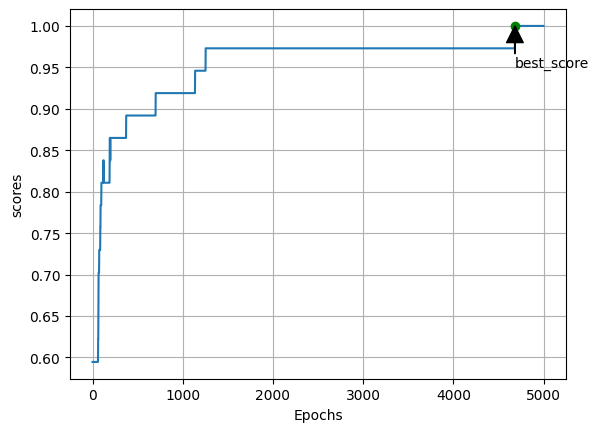

In [166]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(best_epoch,best_score,marker='o',color="green")
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("scores")
plt.annotate("best_score",xy=(best_epoch,best_score),xytext=(best_epoch+0.05,best_score-0.05),arrowprops=dict(facecolor="black",width=0.2))

Introducing cross entropy cost function as score and replacing variable name score with error

In [167]:
(np.log(softmaxproba(validx@theta))).shape

(37, 3)

In [168]:
len(validx)

37

In [169]:
(-validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx))<best_score

array([[ True, False, False],
       [False,  True,  True],
       [False,  True,  True]])

using batch gradient descent

In [170]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)

best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    error= -validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx)
    errors.append(error)
    if ((error<best_error).any()):
        best_error=error
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)

In [171]:
best_theta

array([[ 0.12742257,  2.25723903, -0.4066415 ],
       [-1.30681356,  1.54694131,  1.87471719],
       [ 1.80223538,  0.08492295, -0.18135825],
       [-0.16971899,  0.35874144,  0.77285243],
       [-2.33775145, -1.15888526,  2.34565728]])

In [172]:
accuracy_score(testy,softmaxpred(best_theta,testx))

0.9736842105263158

using stochastic gradient descent

In [173]:
indx= np.random.randint(0,len(validx))
indx

30

In [291]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)
best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
scores=[]
gradients=[]
m=len(validx)
theta_paths=[]
n_epochs=250
def learning_schedule(t):
    return 5/(t+50)
C=100  #regularization hyperparameter
best_epoch=0
for epoch in range(n_epochs):
    idx_used=[]
    for i in range(m): 
        indx= np.random.randint(0,m)
        if indx not in idx_used:
            idx_used.append(indx)
            validy_pred=softmaxpred(theta=theta,x=validx)
            l2_loss = 1 / 2 * (theta[1:] ** 2).sum()
            error= -(validy_encoded.T@np.log(softmaxproba_sto(validx@theta)))/m
            errors.append(error)
            if ((error<best_error).any()):
                best_error=error
                best_theta= theta
                best_epoch=epoch
            graident=trainx[indx].reshape(5,1)@(softmaxproba_sto(trainx[indx]@theta).reshape(1,3) -trainy_encoded[indx])
            gradients.append(graident)
            theta=theta-learning_schedule(i+epoch*m)*graident
            theta_paths.append(theta)
        else:
            i-=1
    score= accuracy_score(validy,validy_pred)
    scores.append(score)


In [292]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))

0.8947368421052632

In [309]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)
best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
scores=[]
mb_size=20
gradients=[]
m=len(validx)
theta_paths=[]
n_epochs=250
C=100  #regularization hyperparameter
best_epoch=0
for epoch in range(n_epochs):
    idx_used=[]
    for i in range(m): 
        indx= np.random.randint(0,m) 
        if indx not in idx_used:
            idx_used.append(indx)
            validy_pred=softmaxpred(theta=theta,x=validx[indx:indx+mb_size])
            l2_loss = 1 / 2 * (theta[1:] ** 2).sum()
            error= -(validy_encoded[indx:indx+mb_size].T@np.log(softmaxproba(validx[indx:indx+mb_size]@theta)))/mb_size
            errors.append(error)
            if ((error<best_error).any()):
                best_error=error
                best_theta= theta
                best_epoch=epoch
            graident=(trainx[indx:indx+mb_size].T@(softmaxproba(trainx[indx:indx+mb_size]@theta) -trainy_encoded[indx:indx+mb_size]))/mb_size
            gradients.append(graident)
            theta=theta-learning_schedule(i*mb_size+epoch)*graident
            theta_paths.append(theta)
        else:
            i-=1


In [310]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))

0.868421052631579